In [1]:
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../../RKLM_Python/')
# Path to output files
sys.path.append('../')

import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal
import pickle

In [2]:
euler = True
rb = False
swe = False

# Plot format for MWR or arXiv?
MWR = True
arXiv = False

locerr = False
covtest = True

In [3]:
def load(base_fn,Nx,Ny,et,Nz=None):
    if rb:
        pydir = '../../%s/loc_errs/' %base_fn
    else:
        pydir = '../../%s/' %base_fn
    
    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    return tc, tags

if swe:
    base_fn = 'output_swe_vortex'
    Nx, Ny, Nz = 64, 1, 64
    et = 3.0
    tc, tags = load(base_fn,Nx,Ny,et,Nz)
    
    attr_labels = pt.swe_labels()
    attributes = ['rho','p2_nodes','rhou','rhow']
    obs_attrs = 'rhou_rhow'
    aux = 'wda'
    aux_ref = ''
    lbl = 'swe'
    times = np.arange(0.0,3.05,0.05)[1:]
    
    x_axs = [-0.5,0.0,0.5]
    y_axs = [-0.5,0.0,0.5]
    axs0, axs1 = Nx, Nz

elif euler:
    base_fn = "output_travelling_vortex"
    Nx, Ny = 64, 64
    et = 3.0
    tc, tags = load(base_fn,Nx,Ny,et)
    
    attr_labels = pt.labels()
    attributes = ['rho','rhoY','rhou','rhov']
    obs_attrs = 'all'
    aux = 'wda'
    aux_ref = ''
    lbl = 'euler'
    times = np.arange(0.0,3.05,0.05)[1:]
#     times = np.arange(0.0,3.01,0.01)[1:10]
    
    x_axs = [-0.5,0.0,0.5]
    y_axs = [-0.5,0.0,0.5]
    axs0, axs1 = Nx, Ny
    
elif rb:
    base_fn = "output_rising_bubble"
    Nx, Ny = 160,80
    et = 1.0
    tc, tags = load(base_fn,Nx,Ny,et)
    
    attr_labels = pt.labels()
    attributes = ['rho','rhoY','rhou','rhov']
    obs_attrs = 'rhou_rhov'
    aux = 'wda_CFLfixed'
    aux_ref = '_CFLfixed'
    lbl = 'rb'
    times = np.arange(1.0,10.1,0.1) / 10.0
#     times = np.arange(1.0, 2.1, 0.1) / 10.0
    
    x_axs = [-10,-5,0.0,5,10]
    y_axs = [0.0,5.0,10.0]
    axs0, axs1 = Nx, Ny
    
ens_noda_suffix = 'noda%s_ib-0' %aux_ref
ens_noda_label = 'EnNoDA'

ens_1_radius = '5'
aux_sfx = aux+'_'+ens_1_radius if euler else aux
ens_1_suffix = 'wdawloc_%s_%s_ib-0' %(obs_attrs,aux_sfx)
ens_1_label = r'%sx%s' %(ens_1_radius,ens_1_radius)

ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_1_suffix))
ens_2_label = ens_1_label+' (B)'

ens_3_radius = '21'
ens_3_suffix = 'wdawloc_%s_%s_ib-0' %(obs_attrs,aux+'_'+ens_3_radius)
ens_3_label = r'%sx%s' %(ens_3_radius,ens_3_radius)


ens_4_suffix = tc.cb_suffix(1,0, '%s' %(ens_3_suffix))
ens_4_label = ens_3_label+' (B)'

ens_5_radius = '71'
ens_5_suffix = 'wdawloc_%s_%s_ib-0' %(obs_attrs,aux+'_'+ens_5_radius)
ens_5_label = r'%sx%s' %(ens_5_radius,ens_5_radius)
ens_5_label = 'NoLoc'

ens_6_suffix = tc.cb_suffix(1,0, '%s' %(ens_5_suffix))
ens_6_label = ens_5_label+' (B)'


def get_everythinger(truth, radius, attribute, gt, ax, color, blending=False, avg = False, mevery=5):
    ens_suffix = 'wdawloc_%s_%s_ib-0' %(obs_attrs,aux+'_'+str(radius))
#     if radius == 41:
#         ens_suffix += '_old'
    if locerr:
        
        ens_label = r'%sx%s' %(radius,radius)
    elif covtest:
        ens_label = r'%s' %radius
    
#     print(ens_suffix)
    
    if radius == 63:
        ens_label = 'EnNoLoc'
        
    if blending:
        ens_suffix = tc.cb_suffix(1,0, '%s' %(ens_suffix))
        color = color + '-'
        ens_label += ' (B)'
    ens = get_ens(ens_suffix,attribute,lbl)
    diff_ens = tc.spatially_averaged_rmse(ens,truth,avg=avg,grid_type=gt)
#     print(diff_ens)
    if locerr:
        ms = 12.0 if '*' in color else 8.0
    elif covtest:
        ms = 10.0 if '*' in color else 6.0
        mevery = 4 if bld else 6
    if attribute == 'rhoY' or attribute == 'p2_nodes':
        ll = ax.semilogy(times,diff_ens, color, lw=2.0, markevery=mevery, ms=ms, label=ens_label)
    else:
        ll = ax.plot(times,diff_ens, color, lw=2.0, markevery=mevery, ms=ms, label=ens_label)
    
    return ll, ens_label, ens_suffix
    
N = 10

rho (0.006274920888245106, 0.0945025896653533)
rhoY (0.04855025078744913, 3.504062571475527)
rhou (0.7294946849346161, 11.921348816156387)
rhow (1.010641062259674, 11.631712234020233)


/home/ray/anaconda3/envs/playground/lib/python3.7/site-packages/ipykernel_launcher.py:221: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


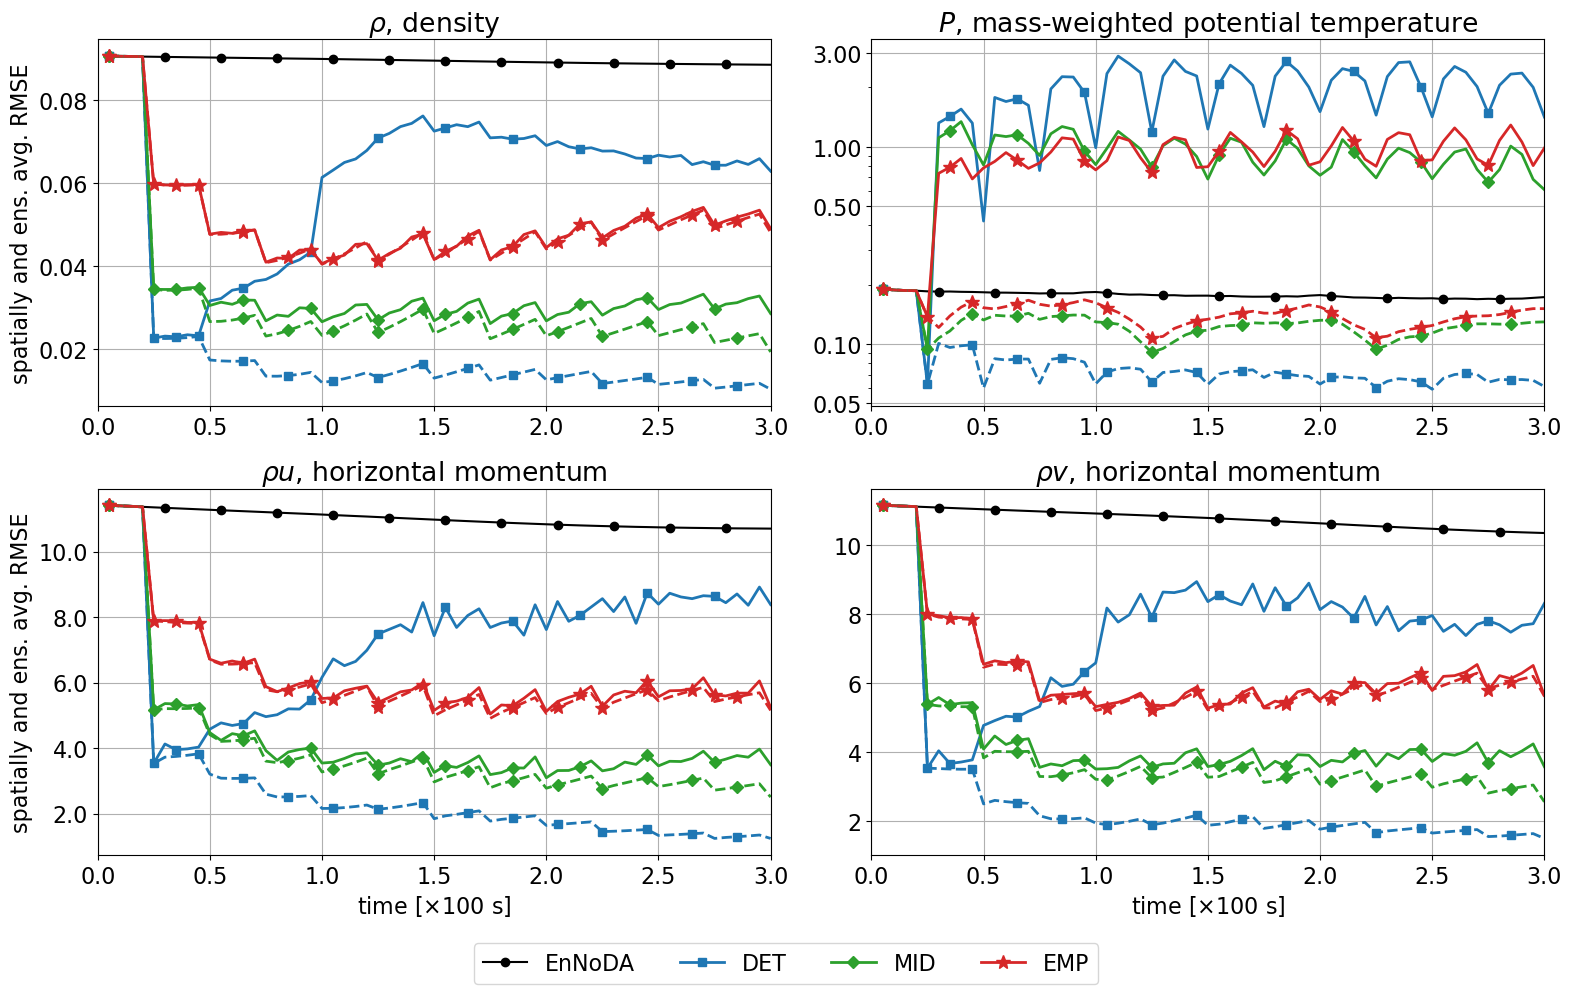

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FixedLocator
from matplotlib import ticker

plt.style.use('default')

fs = (16,10) if locerr else (16,10) # MWR and arXiv
nrows = 2
if MWR:
    pl = pt.plotter_1d(figsize=fs,fontsize=16,ncols=2,nrows=nrows)
elif arXiv:
    pl = pt.plotter_1d(figsize=fs,fontsize=16,ncols=2,nrows=nrows)

def ic_loader(tc, N, sfx, lbl):
    # load pickled instances of data used in simulation
    fn_pickle = tc.get_filename(N,sfx,format='dat')
    path_pickle = tc.get_path(fn_pickle)

    file = open(path_pickle,'rb')
    ud = pickle.load(file)
    file.close()

    return ud

def unitify(arr,attribute,tc,N,sfx,lbl):
    ud = ic_loader(tc,N,sfx,lbl)
    if swe:
        if attribute == 'rho' or attribute == 'p2_nodes':
            arr *= ud.h_ref
        if attribute == 'rhou' or attribute == 'rhow':
            arr *= ud.h_ref * ud.u_ref
    else:
        if attribute == 'rho':
            arr *= ud.rho_ref
#             print(arr.shape)
#             print(ud.rho_ref)
        if attribute == 'rhou' or attribute == 'rhov':
            arr *= ud.rho_ref * ud.u_ref
        if attribute == 'rhoY':
            arr *= ud.rho_ref * ud.T_ref
        
    if attribute == 'p2_nodes':
        arr *= ud.Msq
    return arr

bld = False
def get_ens(sfx,attribute,lbl,diff=False):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=False, diff=diff)[1:]
    if swe:
        ens = ens[:,:,0,:]
        
    ens = unitify(ens, attribute, tc, N, sfx, lbl)
        
    return ens

for i,attribute in enumerate(attributes):
    gt = 'n' if attribute == 'p2_nodes' else 'c'

    truth = tc.get_ensemble(times, 1, attribute, 'truth%s_ib-0' %aux_ref, label_type='TIME',avg=True)[1:]
    if swe: truth = truth[:,:,0,:]
    truth = unitify(truth, attribute, tc, 1, 'truth%s_ib-0' %aux_ref,lbl)

    ax = pl.get_ax(i)
    avg = False

    ens_noda = get_ens(ens_noda_suffix,attribute,lbl)
    diff_noda = tc.spatially_averaged_rmse(ens_noda,truth,avg=avg,grid_type=gt)
    l0 = ax.plot(times,diff_noda, 'k-o', markevery=5, label=ens_noda_label)
    
    if euler and locerr:
        l3, l3_lbl, _ = get_everythinger(truth, 5, attribute, gt, ax, 'C6s-', blending=bld, mevery=(0,5))
    #     l7, l7_lbl = get_everythinger(7, attribute, gt, ax, 'C8', blending=bld)
        l11, l11_lbl, _ = get_everythinger(truth, 11, attribute, gt, ax, 'C1^-', blending=bld, mevery=(1,5))
        l21, l21_lbl, _ = get_everythinger(truth, 21, attribute, gt, ax, 'C8D-', blending=bld, mevery=(1,5))
        l41, l41_lbl, _ = get_everythinger(truth, 41, attribute, gt, ax, 'C9*-', blending=bld, mevery=(2,5))
        l63, l63_lbl, _ = get_everythinger(truth, 63, attribute, gt, ax, 'C5X-', blending=bld, mevery=(3,5))
    elif euler and covtest:
        bld = False
        l3, l3_lbl, _ = get_everythinger(truth, 'DET', attribute, gt, ax, 'C0s-', blending=bld, mevery=(0,5))
        l21, l21_lbl, _ = get_everythinger(truth, 'MID', attribute, gt, ax, 'C2D-', blending=bld, mevery=(1,5))
        l41, l41_lbl, _ = get_everythinger(truth, 'EMP', attribute, gt, ax, 'C3*-', blending=bld, mevery=(2,5))
        bld = True
        l3b, l3b_lbl, _ = get_everythinger(truth, 'DET', attribute, gt, ax, 'C0s-', blending=bld, mevery=(0,5))
        l21b, l21b_lbl, _ = get_everythinger(truth, 'MID', attribute, gt, ax, 'C2D-', blending=bld, mevery=(1,5))
        l41b, l41b_lbl, _ = get_everythinger(truth, 'EMP', attribute, gt, ax, 'C3*-', blending=bld, mevery=(2,5))
    elif rb:
        l3, l3_lbl, _ = get_everythinger(truth, 5, attribute, gt, ax, 'C6-', blending=bld, mevery=(0,5))
    #     l7, l7_lbl = get_everythinger(7, attribute, gt, ax, 'C8', blending=bld)
        l11, l11_lbl, _ = get_everythinger(truth, 11, attribute, gt, ax, 'C1-', blending=bld, mevery=(1,5))
        l21, l21_lbl, _ = get_everythinger(truth, 21, attribute, gt, ax, 'C8-', blending=bld, mevery=(1,5))
        l41, l41_lbl, _ = get_everythinger(truth, 41, attribute, gt, ax, 'C9-', blending=bld, mevery=(2,5))
        l63, l63_lbl, _ = get_everythinger(truth, 71, attribute, gt, ax, 'C5-', blending=bld, mevery=(3,5))
#     
#     l2 = ax.plot(times,diff_ens_1, 'C6', label=ens_1_label)
#     l3 = ax.plot(times,diff_ens_2, 'C6--', label=ens_2_label)
#     l4 = ax.plot(times,diff_ens_3, 'C8', label=ens_3_label)
#     l5 = ax.plot(times,diff_ens_4, 'C8--', label=ens_4_label)
#     l6 = ax.plot(times,diff_ens_5, 'C9', label=ens_5_label)
#     l7 = ax.plot(times,diff_ens_6, 'C9--', label=ens_6_label)

    if euler and attribute == 'rhov':
        attribute = 'rhow'
    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([0.0,times[-1]])
    
    formatter = ticker.ScalarFormatter()
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1))
    print(attribute, ax.get_ylim())
    
    if locerr:
        if rb:
#             ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
            if attribute == 'rhoY' or attribute == 'rho':
                ax.yaxis.set_major_formatter(formatter)
#                 ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#                 
                if attribute == 'rhoY':
                    ax.yaxis.set_minor_formatter(formatter)
                    if bld:
                        pos = np.array([2,3,4,6,8]) * 1e-2
                    else:
                        pos = np.array([0.3,0.6,2.0,3.0]) * 1e-1
                    y_locator = FixedLocator(pos)
                    ax.yaxis.set_minor_locator(y_locator)
                    ax.grid(which='both')
                else:
                    ax.grid()
                ax.get_yaxis().get_offset_text().set_position((-0.05,1.1))
            else:
                ax.grid()
            if attribute == 'rhov':
                ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                
        if euler:
            if attribute == 'rhoY':
                ax.yaxis.set_major_formatter(formatter)
                if bld:
                    pos = np.array([0.6,1.0,2.0]) * 1e-1
                else:
                    pos = np.array([0.05,0.1,1.0,3.0])
                y_locator = FixedLocator(pos)
                ax.yaxis.set_major_locator(y_locator)
                ax.yaxis.set_minor_locator(FixedLocator([]))
                ax.get_yaxis().get_offset_text().set_position((-0.05,1.5))
                if bld:
                    ax.set_ylim([ax.get_ylim()[0],ax.get_ylim()[1]+0.01])
            if attribute == 'rhou' or attribute == 'rhov':
                ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            ax.grid()
    
            
    if covtest:
        if attribute == 'rhou' or attribute == 'rhov':
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        if attribute == 'rhoY':
            ax.yaxis.set_major_formatter(formatter)
            pos = np.array([0.05,0.1,0.5,1.0,3.0])
            y_locator = FixedLocator(pos)
            ax.yaxis.set_major_locator(y_locator)
            ax.get_yaxis().get_offset_text().set_position((-0.05,1.05))
#             ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax.grid()
        else:
            ax.grid()
            
#     if not euler:
#         ax.legend()
    
    plt.tight_layout(rect=[-0.0, -0.0, 1.0, 1.05])
    
    if MWR:
        if attribute == 'rho':
            ax.set_ylabel("spatially and ens. avg. RMSE")
#             ax.set_ylabel("relative error")
        elif attribute == 'rhou':
            ax.set_ylabel("spatially and ens. avg. RMSE")
#             ax.set_ylabel("relative error")
    elif arXiv:
        if attribute == 'rho':
            ax.set_ylabel("RMSE")
        elif attribute == 'rhou':
            ax.set_ylabel("RMSE")
    if euler:
        if attribute == 'rhou':
            ax.set_xlabel(r'time [$\times 100$ s]')
        elif attribute == 'rhow':
            ax.set_xlabel(r'time [$\times 100$ s]')
    elif rb:
        if attribute == 'rhou':
            ax.set_xlabel(r'time [$\times 1000$ s]')
        elif attribute == 'rhov':
            ax.set_xlabel(r'time [$\times 1000$ s]')

pl.fig.tight_layout()
if MWR:
    if locerr:
        pl.fig.subplots_adjust(bottom=0.13)
#         if euler:
#             pl.fig.subplots_adjust(top=1.05)
    else:
        pl.fig.subplots_adjust(bottom=0.13)
elif arXiv:
    pl.fig.subplots_adjust(bottom=0.15)
    
if locerr:
    graphs = (l0, l3, l11, l21, l41, l63)
    labels = (ens_noda_label, l3_lbl, l11_lbl, l21_lbl, l41_lbl, l63_lbl)
elif covtest:
    graphs = (l0, l3, l21, l41)
    labels = (ens_noda_label, l3_lbl, l21_lbl, l41_lbl)
pl.fig.legend(graphs, 
#                   labels=('EnNoDA', r'EnDA $\{ \rho u, \rho w \}$', r'EnDAB $\{ \rho u, \rho w \}$', 
#                           r'EnDA $\{ \rho, \rho u, \rho w, P, \pi \}$', r'EnDAB $\{ \rho, \rho u, \rho w, P, \pi \}$'),
              labels = labels,
              ncol=7,
#                   ncol=3,
              loc='lower center',
              bbox_to_anchor=(0.5, -0.01, 0.0, 0.0),
              fontsize='medium'
             )
    
# plt.tight_layout()
if bld:
    bld_lbl = "B"
else:
    bld_lbl = ""
ttyp_lbl = "CovTests" if covtest else "LocErrs"
plt.savefig('./output/%s%s%s.pdf' %(lbl,ttyp_lbl,bld_lbl), bbox_inches="tight")
plt.show()

[3.0]
rhou
(1, 10, 64, 64)
(1, 10, 64, 64)
(1, 10, 64, 64)
(1, 10, 64, 64)
Norms:
326.7867
537.97345
262.7256
Errors:
[5.1060414]
[8.405835]
[4.1050878]
Ens. Errors:
(10, 10, 64, 64)
[5.123945]
[8.407946]
[4.1060624]
12
0 55.203392 135.69176
1 55.149128 135.11963
2 54.803627 134.8465
3 55.858208 134.96082
4 42.855137 143.74277
5 42.725105 143.80147
6 43.166138 143.6091
7 42.8453 143.58919
8 61.542583 130.06213
9 61.68194 130.1846
10 61.637016 130.07481
11 61.702766 130.05019


/home/ray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:290: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
../plotting_tools.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.arr_lst = np.array(arr_lst)


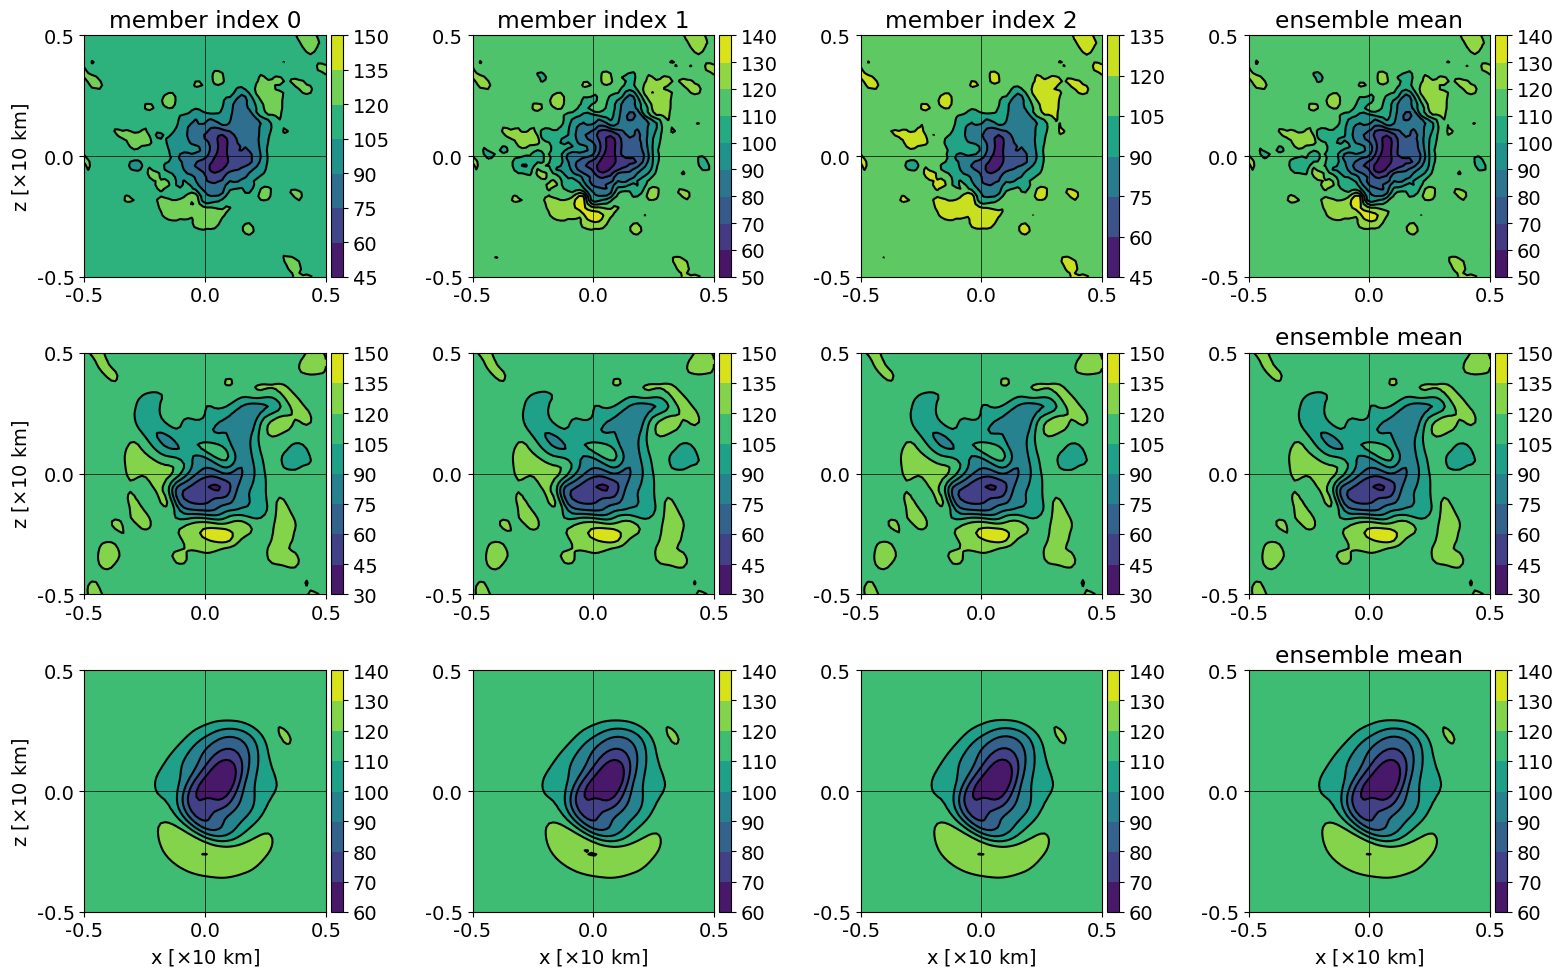

In [98]:
# plot pressure / water depth perturbation
attributes = ['p2_nodes']
attributes = ['rhou']

# plot the very last output
times = [3.0]
ens_time = [times[-1]]
# ens_time = [1.0]
times = ens_time
print(ens_time)
tag = tags[9]
# tag = 'ic'

class oo(object): pass
ens0_oo = oo()
ens1_oo = oo()
ens_ref_oo = oo()

bld = False

def get_everythinger(truth, radius, attribute, gt, ax, color, blending=False, avg = False, mevery=5):
    ens_suffix = 'wdawloc_%s_%s_ib-0' %(obs_attrs,aux+'_'+str(radius))
    ens_label = r'%sx%s' %(radius,radius)
    
    if radius == 63:
        ens_label = 'EnNoLoc'
        
    if blending:
        ens_suffix = tc.cb_suffix(1,0, '%s' %(ens_suffix))
        ens_label += ' (B)'
    ens = get_ens(ens_suffix,attribute,lbl)
    print(ens.shape)
    diff_ens = tc.spatially_averaged_rmse(ens,truth,avg=avg,grid_type=gt)
    
#     print(diff_ens)
#     print(ens.max(), ens.min())
    return ens, ens_label, ens_suffix

def get_ens(sfx,attribute,lbl,diff=False):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=False, diff=diff, tag=tag)[1:]
    if swe:
        ens = ens[:,:,0,:]
        
    ens = unitify(ens, attribute, tc, N, sfx, lbl)
        
    return ens

if len(attributes) > 1:
    # for plotting of derived quantities, e.g. u,v,w, and Theta.
    for attribute in attributes:
        truth = tc.get_ensemble(times, 1, attributes, 'truth%s_ib-0' %aux_ref, label_type='TIME',avg=True)[1:]
        truth = unitify(truth, attributes[0], tc, 1, 'truth%s_ib-0' %aux_ref,lbl)

        e1,_, e1s = get_everythinger(truth, 5, attributes, gt, ax, 'C6', blending=bld)
        e2,_, e2s = get_everythinger(truth, 11, attributes, gt, ax, 'C9', blending=bld)
        e3,_, e3s = get_everythinger(truth, 21, attributes, gt, ax, 'C5', blending=bld)
#         ens_ref = tc.get_ensemble(times, N, attribute, row_1_suffix, tag=tag, inner=True)[-1]
#         ens0 = tc.get_ensemble(times, N, attribute, row_2_suffix, tag=tag, inner=True)[-1]
#         ens1 = tc.get_ensemble(times, N, attribute, row_3_suffix, tag=tag, inner=True)[-1]
        ens0 = e2
        ens1 = e3
        ens_ref = e1
        setattr(ens0_oo,attribute,ens0)
        setattr(ens1_oo,attribute,ens1)
        setattr(ens_ref_oo,attribute,ens_ref)

    ens0 = getattr(ens0_oo,attributes[1]) / getattr(ens0_oo,attributes[0])
    ens1 = getattr(ens1_oo,attributes[1]) / getattr(ens1_oo,attributes[0])
    ens_ref = getattr(ens_ref_oo,attributes[1]) / getattr(ens_ref_oo,attributes[0])
else:
    attribute = attributes[0]
    print(attribute)
    truth = tc.get_ensemble(times, 1, attribute, 'truth%s_ib-0' %aux_ref, label_type='TIME',avg=True,tag=tag)[1:]
    truth = unitify(truth, attribute, tc, 1, 'truth%s_ib-0' %aux_ref,lbl)
    
#     print(truth.shape)
    ens_noda = get_ens(ens_noda_suffix,attribute,lbl)
    ens_ref,_, e1s = get_everythinger(truth, 5, attribute, gt, ax, 'C6', blending=bld)
#     ens_ref = ens_noda
    ens_0,_, e2s = get_everythinger(truth, 11, attribute, gt, ax, 'C9', blending=bld)
    ens_1,_, e3s = get_everythinger(truth, 41, attribute, gt, ax, 'C5', blending=bld)
    
    ens_ref = ens_ref[0]
    ens0 = ens_0[0]
    ens1 = ens_1[0]
    print(ens_0.shape)
    
#     ens0_rhoY = tc.get_ensemble(times, N, 'rhoY', row_2_suffix, tag=tag, inner=True)[-1]
#     ens1_rhoY = tc.get_ensemble(times, N, 'rhoY', row_3_suffix, tag=tag, inner=True)[-1]
#     ens_ref_rhoY = tc.get_ensemble(times, N, 'rhoY', row_1_suffix, tag=tag, inner=True)[-1]
    
def p_converter(ens,rhoY,ud):
    dp2n = np.array([ (mem - mem.mean()) * ud.Msq for mem in ens ])
    kernel = np.ones((2,2))
    dp2c = np.array([signal.fftconvolve(mem, kernel, mode='valid') / kernel.sum() for mem in dp2n])

    P0 = (rhoY**(ud.gamm-1.0) - dp2c)**(1.0/(ud.gamm-1.0))
    p = rhoY**(ud.gamm) - P0**(ud.gamm)
    p *= ud.p_ref
    return p


def ic_loader(tc, N, sfx, lbl):
    # load pickled instances of data used in simulation
    fn_pickle = tc.get_filename(N,sfx,format='dat')
    path_pickle = tc.get_path(fn_pickle)

    file = open(path_pickle,'rb')
    ud = pickle.load(file)
    file.close()
    
#     if lbl == 'swe':
#         p_ref = ud.h_ref * ud.Msq
#     elif lbl == 'euler':
#         p_ref = ud.p_ref * ud.Msq
#     elif lbl =='rb':
#         p_ref = ud.p_ref * ud.Msq

#     return p_ref
    return ud

ud = ic_loader(tc, N, e2s,lbl)

# ens_ref = p_converter(ens_ref, ens_ref_rhoY, ud)
# ens0 = p_converter(ens0, ens0_rhoY, ud)
# ens1 = p_converter(ens1, ens1_rhoY, ud)

enses = [ens_ref, ens0, ens1]
sfxes = [e1s, e2s, e3s]

if swe:
    mean0 = np.mean(ens0,axis=0)[:,0,:] 
    mean1 = np.mean(ens1,axis=0)[:,0,:]
    mean_ref = np.mean(ens_ref,axis=0)[:,0,:]
else:
    mean0 = np.mean(ens0,axis=0)
    mean1 = np.mean(ens1,axis=0)
    mean_ref = np.mean(ens_ref,axis=0)

diff = False
if diff == True:
    mean0 -= mean_ref
    mean1 -= mean_ref

pl_lst = [[truth[0].T, '']]

axvline = 31.5
axhline = 31.5

# pl = pt.plotter(pl_lst,ncols=1,figsize=(10,5),sharey=False)
# pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
# _ = pl.plot(aspect='equal',method='contour')

# print(truth.shape)
# print(mean_ref.shape)
print("Norms:")
print(np.linalg.norm(mean_ref - truth))
print(np.linalg.norm(mean0 - truth))
print(np.linalg.norm(mean1 - truth))

gt = 'n' if attribute=='p2_nodes' else 'c'
avg = False
print("Errors:")
print(tc.spatially_averaged_rmse(mean_ref[np.newaxis,...],truth,avg=avg,grid_type=gt))
print(tc.spatially_averaged_rmse(mean0[np.newaxis,...],truth,avg=avg,grid_type=gt))
print(tc.spatially_averaged_rmse(mean1[np.newaxis,...],truth,avg=avg,grid_type=gt))

print("Ens. Errors:")
ens0_test = ens0[np.newaxis,...]
ens0_test = np.repeat(ens0_test, 10, axis=0)
print(ens0_test.shape)
print(tc.spatially_averaged_rmse(ens_ref[np.newaxis,...],truth,avg=avg,grid_type=gt))
print(tc.spatially_averaged_rmse(ens0_test,truth,avg=avg,grid_type=gt))
print(tc.spatially_averaged_rmse(ens1[np.newaxis,...],truth,avg=avg,grid_type=gt))

if MWR:
    mean0 = [mean0.T,'ensemble mean']
    mean1 = [mean1.T,'ensemble mean']
    mean_ref = [mean_ref.T,'ensemble mean']
elif arXiv:
    mean0 = [mean0.T,'']
    mean1 = [mean1.T,'']
    mean_ref = [mean_ref.T,'ensemble mean']
means = [mean_ref, mean0, mean1]

arr_lst = []
lvls = []
ens_store, ens_diff = [], []
for bb,ens in enumerate(enses):
    sfx = sfxes[bb]
    fs = (14,8)
        
    ens_arr = []
    for n,arr in enumerate(ens):
        arr_ref = ens_ref[n]
        if swe:
            arr_ref = arr_ref[:,0,:]
            arr = arr[:,0,:]
        else:
            arr_ref = arr_ref.T
            arr = arr.T

        if diff == True:
            arr -= arr_ref
            
        if rb:
            if bb == 1:
                ens_store.append(arr)
            if bb == 2:
                if MWR:
                    ens_diff.append([ens_store[n] - (arr), 'member index %i' %n])
                elif arXiv:
                    ens_diff.append([ens_store[n] - (arr), ''])
        
        if bb == 0:
            if MWR:
                ens_arr.append([arr, 'member index %i' %n])
            elif arXiv:
                ens_arr.append([arr, 'member index %i' %n])
        else:
            ens_arr.append([arr, ''])
            

    # which members to plot?
    arr_lst += [ens_arr[0],ens_arr[1],ens_arr[2]]
#     arr_lst += [ens_arr[0],ens_arr[1],ens_arr[2],ens_arr[3],ens_arr[4],ens_arr[5],ens_arr[6],ens_arr[7],ens_arr[8],ens_arr[9]]
    # append mean to plot
    arr_lst.append(means[bb])

    if rb:
        # exner levels
#         if bb == 0:
#             lvls += [np.arange(-50,40,10)]*4
#         elif bb == 1:
#             lvls += [np.arange(-70,60,20)]*4
#         elif bb == 2:
#             lvls += [np.arange(-50,40,10)]*4
        # pressure levels
        if bb == 0:
            lvls += [np.arange(-100,60,20)]*4
        elif bb == 1:
#             lvls += [np.arange(-70,60,20)]*4
            lvls += [np.arange(-160,120,40)]*4
        elif bb == 2:
#             lvls += [np.arange(-50,40,10)]*4
            lvls += [np.arange(-100,60,20)]*4
            
        
    if euler:
#         # exner levels
#         if bb == 0:
#             lvls += [np.arange(-55,15,10)]*4
#         elif bb == 1:
#             lvls += [np.arange(-550.0,650.0,150.0)]*4
#         elif bb == 2:
#             lvls += [np.arange(-70,10,10)]*4
        # pressure levels
        if bb == 0:
            lvls += [np.arange(-200,40,40)]*4
        elif bb == 1:
#             lvls += [np.arange(-550.0,650.0,150.0)]*4
            lvls += [np.arange(-1900,1300+640,640)]*4
        elif bb == 2:
            lvls += [np.arange(-200,40,40)]*4
    
if rb:
    # which member-diffs to plot?
    arr_lst += [ens_diff[1],ens_diff[5],ens_diff[7]]
    # append mean to plot
    if MWR:
        mean_diff = [means[1][0] - means[2][0], 'ensemble mean']
    elif arXiv:
        mean_diff = [means[1][0] - means[2][0], '']
    arr_lst.append(mean_diff)
#     lvls += [np.arange(-30,50,10)]*4 # exner levels
    lvls += [np.arange(-80,130,30)]*4 # pressure levels
print(len(lvls))

for idx, arr in enumerate(arr_lst):
    if idx % 4 == 0:
        print("===========")
    print(idx, arr[0].min(),arr[0].max())

# if attributes[0] == 'p2_nodes':
#     nnx, nnz = axs0, axs1
#     axh, axv = 32, 32
# else:
nnx, nnz = axs0-1,axs1-1
    
narr_lst = np.array(arr_lst)
ncolslen = 4
if MWR:
    fs = (20,10) if rb else (16,10)
elif arXiv:
    fs = (18,9) if rb else (13,7)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharexlabel=True,shareylabel=True)

x_label = r'x [$\times 10$ km]'
y_label = r'z [$\times 10$ km]'

if rb:
    x_loc = np.linspace(0,nnx,5)
    y_loc = np.linspace(0,nnz,3)
    axh, axv = 39.5, 79.5
    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
#     pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, axhline = axh, axvline = axv, x_label=x_label, y_label=y_label)
else:
    x_loc = np.linspace(0,nnx,3)
    y_loc = np.linspace(0,nnz,3)
    axh, axv = 31.5, 31.5
    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, axhline = axh, axvline = axv, x_label=x_label, y_label=y_label)

# mthd = 'imshow' if rb else 'contour'
mthd = 'contour'
_ = pl.plot(aspect='equal',method=mthd, lvls=None)

pl.save_fig('./output/%sEnses' %lbl)